## Result analyse

### 超参数

In [1]:
import pandas as pd
results = []
for i in range(2):
    # result = pd.read_csv(f'./run_logs/mlp_hpo/MLP_merged_hpo/results{i+1}_summary.csv', header=0)
    # result = pd.read_csv(f'./run_logs/mlp_hpo/MLP_mergedAtt_hpo/results{i+1}_summary.csv', header=0)
    result = pd.read_csv(f'./run_logs/mlp_hpo/MLP_direct_hpo/results{i+1}_summary.csv', header=0)
    result = result.map(lambda x: str(x).split('=')[1])
    result.insert(3,'BatchSize',i+1)
    results.append(result) 
results_df = pd.concat(results, axis=0, ignore_index=True)
results_df.sort_values('AUC_ROC', ascending=False)

,LR,Dropout,FeatDim,BatchSize,HiddenDims,Heads,AUC_ROC,AUC_PR,ACC
2,0.00001,0.2,200,1,1024-1024-1024,2,0.9452,0.9431,0.8720
5,0.00001,0.3,200,1,1024-1024-1024,2,0.9443,0.9423,0.8702
8,0.00001,0.4,200,1,1024-1024-1024,2,0.9438,0.9418,0.8697
1,0.00005,0.2,200,1,1024-1024-1024,2,0.9432,0.9414,0.8690
13,0.00005,0.3,200,2,1024-1024-1024,2,0.9423,0.9402,0.8677
16,0.00005,0.4,200,2,1024-1024-1024,2,0.9413,0.9393,0.8664
10,0.00005,0.2,200,2,1024-1024-1024,2,0.9409,0.9388,0.8633
4,0.00005,0.3,200,1,1024-1024-1024,2,0.9390,0.9369,0.8607
14,0.00001,0.3,200,2,1024-1024-1024,2,0.9370,0.9348,0.8601
0,0.0001,0.2,200,1,1024-1024-1024,2,0.9369,0.9350,0.8580


### MLP消融实验 AUC曲线图

In [1]:
import pandas as pd
import numpy as np
from utils import roc_auc, pr_auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

score_dir = "./train_results/mlp_ablation_merged0215"

merged = pd.read_csv(f'{score_dir}/merged_scores.csv', names=['label', 'KGE_MLP'])
onlyKGE = pd.read_csv(f'{score_dir}/onlyKGE_scores.csv', names=['label', 'onlyKGE'])
onlyFeat = pd.read_csv(f'{score_dir}/onlyFeat_scores.csv', names=['label', 'onlyFeat'])
empty = pd.read_csv(f'{score_dir}/empty_scores.csv', names=['label', 'Empty'])
concat = pd.concat([merged, onlyKGE['onlyKGE'], onlyFeat['onlyFeat'], empty['Empty']], axis=1)

for model in ['KGE_MLP', 'onlyKGE', 'onlyFeat', 'Empty']:
    print(model, f"AUC: {roc_auc(concat['label'], concat[model])}, PR: {pr_auc(concat['label'], concat[model])}")
    
concat

/home/worker/software/anaconda3/envs/pykeen/lib/python3.9/site-packages/pykeen/evaluation/evaluator.py:23: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


KGE_MLP AUC: 0.9504401622884378, PR: 0.9481627791443648
onlyKGE AUC: 0.9448962473259497, PR: 0.9439225966620979
onlyFeat AUC: 0.9195444522754187, PR: 0.906402148675143
Empty AUC: 0.8878168594719862, PR: 0.868836269987153


,label,KGE_MLP,onlyKGE,onlyFeat,Empty
0,1.0,0.736643,0.800187,0.906820,0.777637
1,1.0,0.883155,0.898962,0.913594,0.718958
2,1.0,0.887239,0.676138,0.790053,0.702513
3,1.0,0.631249,0.762012,0.496080,0.730334
4,1.0,0.766208,0.877680,0.685975,0.741085
...,...,...,...,...,...
939819,0.0,0.020183,0.137855,0.529081,0.223285
939820,0.0,0.342502,0.030122,0.392469,0.442412
939821,0.0,0.189065,0.077403,0.018776,0.351978
939822,0.0,0.963828,0.944422,0.885260,0.744353


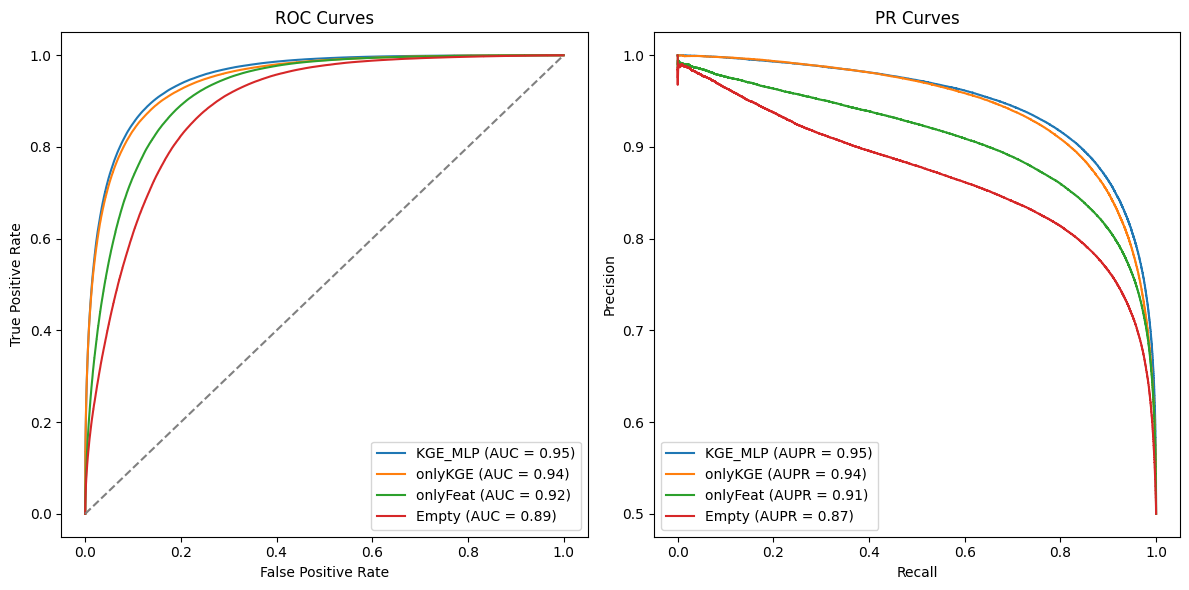

In [8]:
# 真实标签
y_true = concat.iloc[:, 0]

# 初始化绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制ROC曲线
for model in concat.columns[1:]:
    y_pred = concat[model]
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.4f})')

axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_title('ROC Curves')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc="lower right")

# 绘制PR曲线
for model in concat.columns[1:]:
    y_pred = concat[model]
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    avg_precision = average_precision_score(y_true, y_pred)
    axes[1].plot(recall, precision, label=f'{model} (AUPR = {avg_precision:.4f})')

# axes[1].plot([0, 1], [1, 0], color='gray', linestyle='--')
axes[1].set_title('PR Curves')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc="lower left")

plt.tight_layout()
# plt.savefig("roc_pr_curves.png", dpi=300, bbox_inches="tight")
plt.show()

### KGE基线模型 AUC曲线图

In [3]:
import pandas as pd
import numpy as np
from utils import roc_auc, pr_auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

score_dir = "./train_results/mlp_ablation_merged0215"
merged = pd.read_csv(f'{score_dir}/merged_scores.csv', names=['label', 'KGE_MLP'])


score_dir = "./train_results/baseline"
models = ['CompGCN', 'TransE', 'TransR', 'RotatE', 'DistMult', 'ComplEx', 'RESCAL', 'ConvE']
CompGCN = pd.read_csv(f'{score_dir}/CompGCN_scores.csv', names=['label', 'CompGCN'])
TransE = pd.read_csv(f'{score_dir}/TransE_scores.csv', names=['label', 'TransE'])
TransR = pd.read_csv(f'{score_dir}/TransR_scores.csv', names=['label', 'TransR'])
RotatE = pd.read_csv(f'{score_dir}/RotatE_scores.csv', names=['label', 'RotatE'])
DistMult = pd.read_csv(f'{score_dir}/DistMult_scores.csv', names=['label', 'DistMult'])
ComplEx = pd.read_csv(f'{score_dir}/ComplEx_scores.csv', names=['label', 'ComplEx'])
RESCAL = pd.read_csv(f'{score_dir}/RESCAL_scores.csv', names=['label', 'RESCAL'])
ConvE = pd.read_csv(f'{score_dir}/ConvE_scores.csv', names=['label', 'ConvE'])

concat = pd.concat([merged, CompGCN['CompGCN'], TransE['TransE'], TransR['TransR'], RotatE['RotatE'],
                     DistMult['DistMult'], ComplEx['ComplEx'], RESCAL['RESCAL'], ConvE['ConvE']], axis=1)

for model in models:
    print(model, f"AUC: {roc_auc(concat['label'], concat[model]):.4f}., PR: {pr_auc(concat['label'], concat[model]):.4f}")
    
concat

CompGCN AUC: 0.9096., PR: 0.9077
TransE AUC: 0.7850., PR: 0.7973
TransR AUC: 0.8352., PR: 0.8161
RotatE AUC: 0.9162., PR: 0.9158
DistMult AUC: 0.8646., PR: 0.8550
ComplEx AUC: 0.8812., PR: 0.8818
RESCAL AUC: 0.7752., PR: 0.7049
ConvE AUC: 0.5068., PR: 0.4884


,label,KGE_MLP,CompGCN,TransE,TransR,RotatE,DistMult,ComplEx,RESCAL,ConvE
0,1.0,0.736643,0.997796,2.453324e-07,0.255346,0.001020,0.673370,0.949005,0.032636,0.685765
1,1.0,0.883155,0.997389,5.341805e-07,0.334093,0.001227,0.648296,0.946731,0.029677,0.668073
2,1.0,0.887239,0.998910,2.306697e-06,0.302977,0.000998,0.704503,0.978393,0.089368,0.827089
3,1.0,0.631249,0.999535,1.036346e-06,0.451456,0.002872,0.719842,0.990767,0.116134,0.890999
4,1.0,0.766208,0.998958,4.379803e-07,0.410967,0.001196,0.700484,0.979661,0.054634,0.746525
...,...,...,...,...,...,...,...,...,...,...
939819,0.0,0.020183,0.997213,1.519840e-09,0.226745,0.000527,0.696030,0.962841,0.005919,0.917729
939820,0.0,0.342502,0.977702,3.443509e-10,0.282050,0.000302,0.590376,0.902742,0.196393,0.953282
939821,0.0,0.189065,0.989777,1.425797e-10,0.149816,0.000111,0.548655,0.799127,0.000297,0.831951
939822,0.0,0.963828,0.999878,1.326005e-07,0.462373,0.002381,0.693577,0.991889,0.499991,0.994824


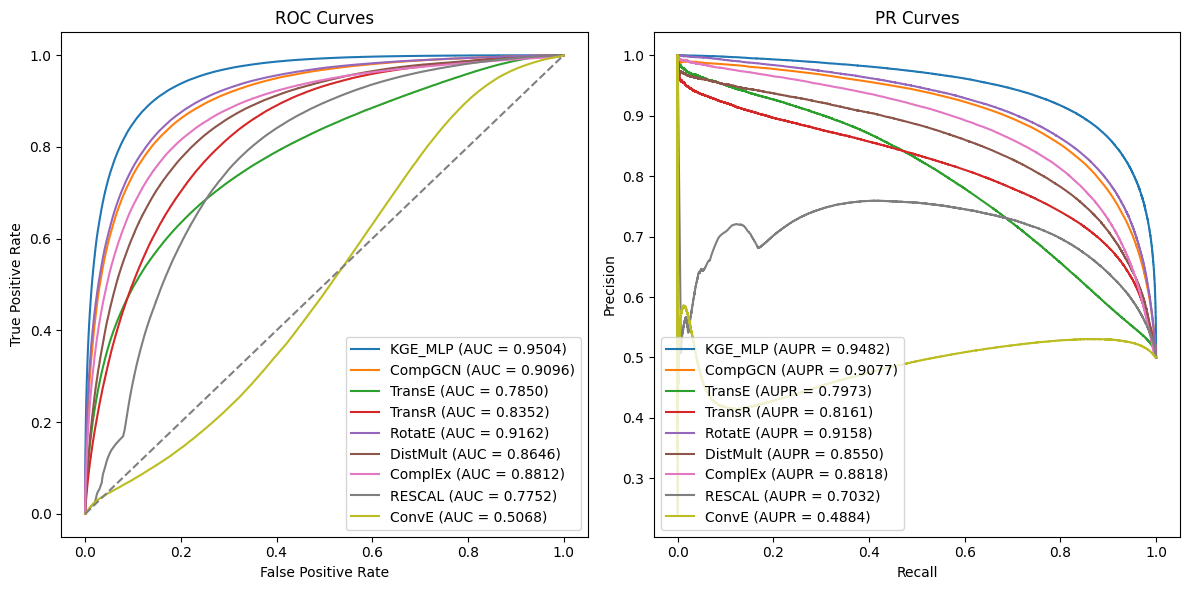

In [4]:
# 真实标签
y_true = concat.iloc[:, 0]

# 初始化绘图
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 绘制ROC曲线
for model in concat.columns[1:]:
    y_pred = concat[model]
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.4f})')

axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[0].set_title('ROC Curves')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend(loc="lower right")

# 绘制PR曲线
for model in concat.columns[1:]:
    y_pred = concat[model]
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    avg_precision = average_precision_score(y_true, y_pred)
    axes[1].plot(recall, precision, label=f'{model} (AUPR = {avg_precision:.4f})')

# axes[1].plot([0, 1], [1, 0], color='gray', linestyle='--')
axes[1].set_title('PR Curves')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc="lower left")

plt.tight_layout()
# plt.savefig("roc_pr_curves.png", dpi=300, bbox_inches="tight")
plt.show()

### 新兴靶点验证基线比较

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

score_dir = "./train_results/case_res/0304"
base_models = ['CompGCN', 'TransE', 'TransR', 'RotatE', 'DistMult', 'ComplEx', 'RESCAL', 'ConvE']

mlp_ranks = pd.read_csv(f'{score_dir}/mlp_target_ranks.csv', dtype=object)
mlp_gene_ranks = mlp_ranks.iloc[:,:5].copy(deep=True).rename(columns={'gene_rank': 'TarDis'})
mlp_disease_ranks = mlp_ranks.drop(columns=['gene_rank'], axis=1).rename(columns={'disease_rank': 'TarDis'})
mlp_ranks

,d_name,d_id,g_name,g_id,gene_rank,disease_rank
0,阿尔兹海默症,DOID:10652,ISG15_HUMAN,P05161,171,23
1,癌症,DOID:162,MOT11_HUMAN,Q8NCK7,373,458
2,结肠炎,DOID:0060180,NLRC5_HUMAN,Q86WI3,440,23
3,炎症,MESH:D007249,GLO2_HUMAN,Q16775,577,68
4,肺纤维化,DOID:3770,TPIS_HUMAN,P60174,628,117
5,肥胖,DOID:9970,TIGAR_HUMAN,Q9NQ88,709,66
6,肝癌,DOID:3571,DYR1A_HUMAN,Q13627,859,51
7,癌症,DOID:162,IRGQ_HUMAN,Q8WZA9,1541,1046
8,三阴性乳腺癌,DOID:0060081,SOSD1_HUMAN,Q6X4U4,1950,118
9,骨质疏松症,DOID:11476,CCN3_HUMAN,P48745,1964,41


In [2]:
geng_ranks_res = [mlp_gene_ranks]
disease_ranks_res = [mlp_disease_ranks]
for model in base_models:
    gene_ranks = pd.read_csv(f'{score_dir}/{model.lower()}_target_ranks.csv', skiprows=1, usecols=(4,), names=[model], dtype=object)
    geng_ranks_res.append(gene_ranks)
    disease_ranks = pd.read_csv(f'{score_dir}/{model.lower()}_target_ranks.csv', skiprows=1, usecols=(5,), names=[model], dtype=object)
    disease_ranks_res.append(disease_ranks)
geng_ranks_res_df = pd.concat(geng_ranks_res, axis=1)
disease_ranks_res_df = pd.concat(disease_ranks_res, axis=1)
disease_ranks_res_df

,d_name,d_id,g_name,g_id,TarDis,CompGCN,TransE,TransR,RotatE,DistMult,ComplEx,RESCAL,ConvE
0,阿尔兹海默症,DOID:10652,ISG15_HUMAN,P05161,23,45,26565,26627,26687,1745,10,24759,47
1,癌症,DOID:162,MOT11_HUMAN,Q8NCK7,458,7844,18096,20749,19070,5252,6762,13166,4392
2,结肠炎,DOID:0060180,NLRC5_HUMAN,Q86WI3,23,41,26843,26463,26581,1140,137,26220,171
3,炎症,MESH:D007249,GLO2_HUMAN,Q16775,68,502,26752,20581,26858,5073,26,26933,28
4,肺纤维化,DOID:3770,TPIS_HUMAN,P60174,117,740,26584,25918,26475,85,343,24484,276
5,肥胖,DOID:9970,TIGAR_HUMAN,Q9NQ88,66,26248,26826,26293,26903,3588,18,25651,132
6,肝癌,DOID:3571,DYR1A_HUMAN,Q13627,51,26188,26725,25285,26755,426,15,7695,27
7,癌症,DOID:162,IRGQ_HUMAN,Q8WZA9,1046,10639,18999,26959,25708,5307,8302,12701,5759
8,三阴性乳腺癌,DOID:0060081,SOSD1_HUMAN,Q6X4U4,118,32,26697,24514,26863,706,36,26953,82
9,骨质疏松症,DOID:11476,CCN3_HUMAN,P48745,41,25602,26494,25070,26594,805,23,19211,152


In [4]:
df = disease_ranks_res_df.iloc[:,4:]
# df = geng_ranks_res_df.iloc[:,4:]

/tmp/ipykernel_109981/3006723915.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Rank", data=df_long, palette="muted", width=0.5)


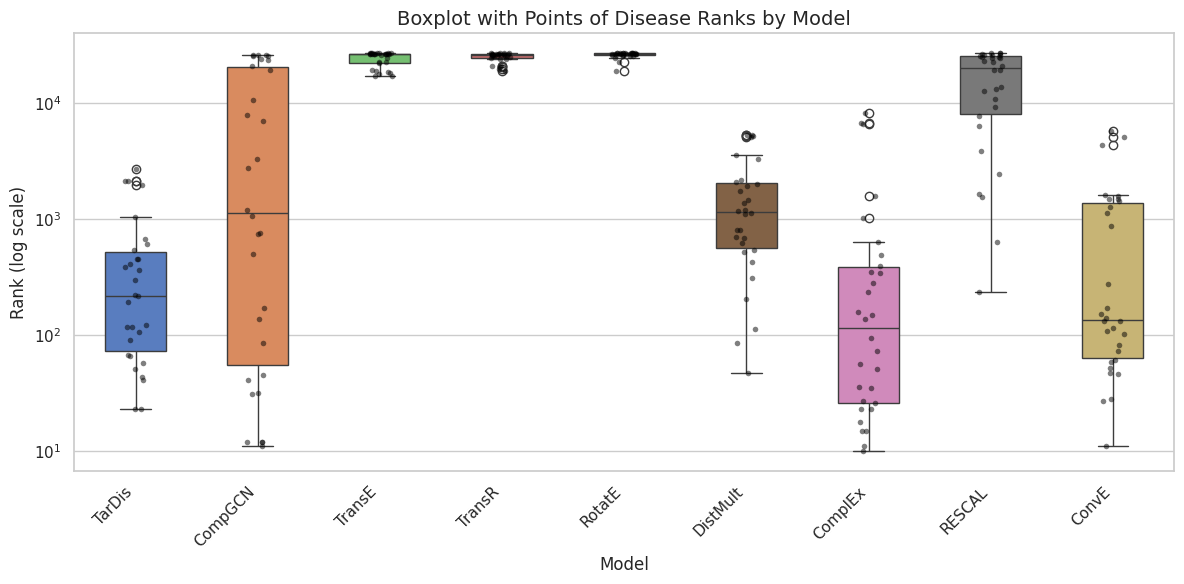

/tmp/ipykernel_109981/3006723915.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Rank", data=df_long, palette="muted", width=0.5)


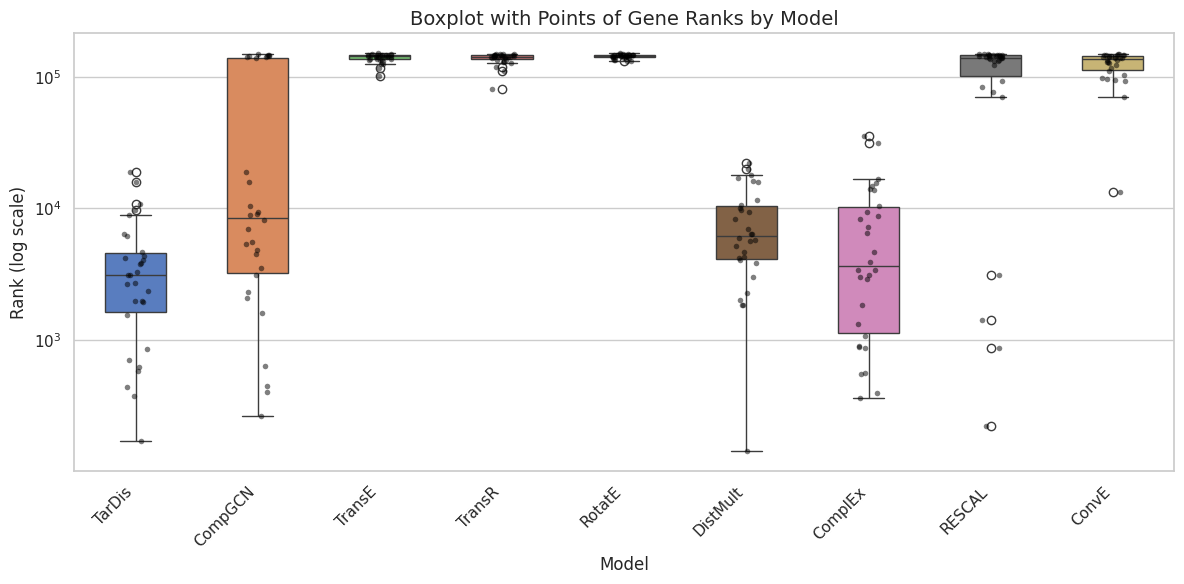

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for ent_type in ['Disease', 'Gene']:
    # 创建 DataFrame
    if ent_type == 'Disease':
        df = disease_ranks_res_df.iloc[:,4:]
    elif ent_type == 'Gene':
        df = geng_ranks_res_df.iloc[:,4:]

    df = df.astype(int)

    # 将数据转换为长格式，便于绘图
    df_long = df.melt(var_name="Model", value_name="Rank")

    # 设置绘图样式
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # 绘制箱型图
    sns.boxplot(x="Model", y="Rank", data=df_long, palette="muted", width=0.5)

    # 添加散点图（带点）
    sns.stripplot(x="Model", y="Rank", data=df_long, color="black", size=4, alpha=0.5)

    # 设置对数刻度
    plt.yscale("log")
    plt.ylabel("Rank (log scale)", fontsize=12)

    # 设置标题和标签
    plt.title(f"Boxplot with Points of {ent_type} Ranks by Model", fontsize=14)
    plt.xlabel("Model", fontsize=12)

    # 旋转 x 轴标签以避免重叠
    plt.xticks(rotation=45, ha="right")

    # 调整布局
    plt.tight_layout()

    # 显示图表
    plt.show()

/tmp/ipykernel_109981/665905750.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Model", y="Rank", data=df_long, palette="muted", size=5)
/home/worker/software/anaconda3/envs/pykeen/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/worker/software/anaconda3/envs/pykeen/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/worker/software/anaconda3/envs/pykeen/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the mar

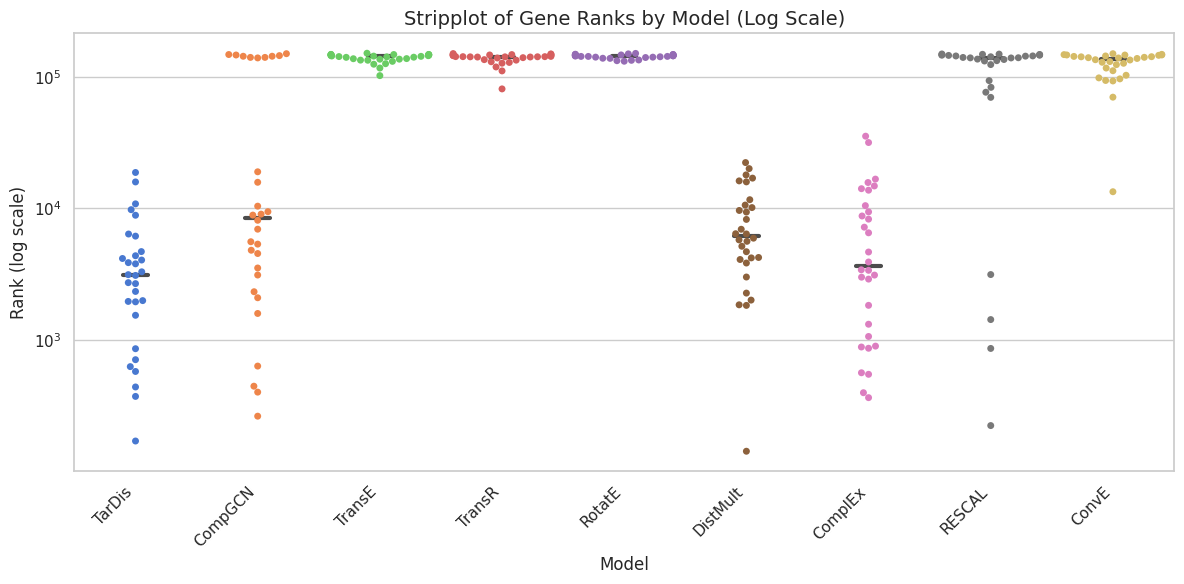

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建 DataFrame
df = geng_ranks_res_df.iloc[:,4:]
df = df.astype(int)

# 将数据转换为长格式，便于绘图
df_long = df.melt(var_name="Model", value_name="Rank")

# 设置绘图样式
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# 绘制小提琴图，使用对数刻度
# sns.violinplot(x="Model", y="Rank", data=df_long, palette="muted", width=0.6)  # 减小宽度

# 绘制 stripplot（散点图），使用对数刻度
# sns.stripplot(x="Model", y="Rank", data=df_long, palette="muted", size=6, alpha=0.6)
# sns.pointplot(x="Model", y="Rank", data=df_long, color="pink", markers="D", scale=0.5)
sns.swarmplot(x="Model", y="Rank", data=df_long, palette="muted", size=5)

# 设置对数刻度
plt.yscale("log")
plt.ylabel("Rank (log scale)", fontsize=12)

# 设置标题和标签
plt.title("Stripplot of Gene Ranks by Model (Log Scale)", fontsize=14)
plt.xlabel("Model", fontsize=12)

# 旋转 x 轴标签以避免重叠
plt.xticks(rotation=45, ha="right")


# 添加每个模型的中位数横线（更短、更居中）
models = df_long["Model"].unique()
n_models = len(models)
for model in models:
    median = df_long[df_long["Model"] == model]["Rank"].median()
    model_idx = list(models).index(model)
    # 进一步缩小范围，使横线更短并居中
    xmin = (model_idx + 0.4) / n_models
    xmax = (model_idx + 0.6) / n_models
    plt.axhline(y=median, color="black", linestyle="-", linewidth=3, alpha=0.7, xmin=xmin, xmax=xmax)

    
# 调整布局
plt.tight_layout()

# 显示图表
plt.show()